In [1]:
!pip install --upgrade tables
!pip install eli5
!pip install xgboost
!pip install hyperopt

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 112kB 2.8MB/s 


In [2]:
import pandas as pd
import numpy as np

# from sklearn.dummy import DummyRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score, KFold

from hyperopt import hp, fmin, tpe, STATUS_OK

import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [3]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


In [4]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

## Feature Engineering

In [0]:
SUFFIX_CAT = '__cat'

for feat in df.columns:
  if isinstance(df[feat][0], list): continue

  factorized_values = df[feat].factorize()[0]
  if SUFFIX_CAT not in feat:
    df[feat + SUFFIX_CAT] = factorized_values

In [0]:
df['param_rok-produkcji'] = df['param_rok-produkcji'].map(lambda x: -1 if str(x) == 'None' else int(x))
df['param_moc'] = df['param_moc'].map(lambda x: -1 if str(x) == 'None' else int(x.split(' ')[0]))
df['param_pojemność-skokowa'] = df['param_pojemność-skokowa'].map(lambda x: -1 if str(x) == 'None' else int(x.split('cm')[0].replace(' ', '')))

In [0]:
def run_model(model, feats):
  X = df[feats].values
  y = df['price_value'].values

  scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [19]:
feats = ['param_napęd__cat', 'param_rok-produkcji', 'param_stan__cat', 'param_skrzynia-biegów__cat', 'param_faktura-vat__cat', 'param_moc', 'param_marka-pojazdu__cat', 'feature_kamera-cofania__cat', 'param_typ__cat', 'param_pojemność-skokowa', 'seller_name__cat', 'feature_wspomaganie-kierownicy__cat', 'param_model-pojazdu__cat', 'param_wersja__cat', 'param_kod-silnika__cat', 'feature_system-start-stop__cat', 'feature_asystent-pasa-ruchu__cat', 'feature_czujniki-parkowania-przednie__cat', 'feature_łopatki-zmiany-biegów__cat', 'feature_regulowane-zawieszenie__cat']

xgb_params = {
  'max_depth': 5,
  'n_estimators': 50,
  # 'random_state': 0,
  # 'learning_rate': 0.1,
  'seed': 0
}

run_model(xgb.XGBRegressor(**xgb_params), feats)

[23:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-9569.227198767323, 72.83561801421891)

In [81]:
# res_var_depth = dict()
# res_var_estimators = dict()

for v_max_depth in range(1, 11):
  print(v_max_depth)
  v_n_estimators = 10
  v_mean, v_std = run_model(xgb.XGBRegressor(max_depth=v_max_depth, n_estimators=v_n_estimators, seed=0), feats)
  res_var_depth.update({v_max_depth: round(v_mean)})
# for v_n_estimators in range(1, 11):
#   v_max_depth = 10
#   print(v_n_estimators)
#   v_mean, v_std = run_model(xgb.XGBRegressor(max_depth=v_max_depth, n_estimators=v_n_estimators * 10, seed=0), feats)
#   res_var_estimators.update({v_n_estimators: round(v_mean)})


1
[00:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2
[00:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3
[00:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

## Params (I) for run_model

  v_max_depth = range(1, 11)

  v_n_estimators = 10



In [44]:
res_var_depth

{1: -24846.0,
 2: -21169.0,
 3: -19528.0,
 4: -18903.0,
 5: -18528.0,
 6: -18304.0,
 7: -18181.0,
 8: -18122.0,
 9: -18126.0,
 10: -18170.0}

## Params (II) for run_model

v_max_depth = 10

v_n_estimators = range(10, 101, 10)



In [78]:
res_var_estimators

{1: -18170.0,
 2: -10212.0,
 3: -8531.0,
 4: -8141.0,
 5: -7981.0,
 6: -7878.0,
 7: -7785.0,
 8: -7724.0,
 9: -7668.0,
 10: -7622.0}

## Fig. for params (I) & (II)

blue -> var_estimators = range(10, 101, 10) @ depth = const = 10

time = 2 s @ 10 (linear)

orange -> var_depth = range(1, 11, 1) @ estimators = const = 10

time = 2-3 s @ 10

<BarContainer object of 10 artists>

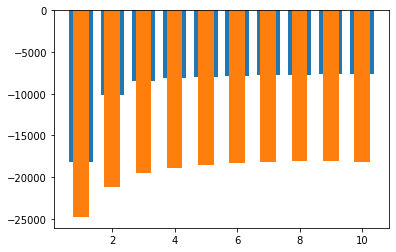

In [80]:
import matplotlib.pyplot as plt

res = res_var_depth
keys = res.keys() 
vals = res.values()

plt.bar(res_var_estimators.keys(), res_var_estimators.values(), width = 0.75)

plt.bar(res_var_depth.keys(), res_var_depth.values(), width = 0.5)

## Hyperopt

In [82]:
def obj_func(params):
  print('Training with params:')
  print(params)

  mean_mae, score_std = run_model(xgb.XGBRegressor(**params), feats)

  return {'loss': np.abs(mean_mae), 'status': STATUS_OK}

#przestrzen

xgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate', np.arange(0.05, 0.31, 0.05)),
    'max_depth':        hp.choice('max_depth', np.arange(5, 16, 1, dtype=int)),
    'subsample':        hp.quniform('subsample', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    'objective':        'reg:squarederror',
    'n_estimators':     100, 
    'seed':             0,
}

# run

best = fmin(obj_func, xgb_reg_params, algo=tpe.suggest, max_evals=5)

best

Training with params:
{'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.75}
Training with params:
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.15000000000000002, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.55}
Training with params:
{'colsample_bytree': 0.75, 'learning_rate': 0.25, 'max_depth': 12, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 1.0}
Training with params:
{'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.5}
Training with params:
{'colsample_bytree': 0.65, 'learning_rate': 0.15000000000000002, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.6000000000000001}
100%|██████████| 5/5 [03:07<00:00, 36.02s/it, best loss: 7690.842163415

{'colsample_bytree': 0.75,
 'learning_rate': 4,
 'max_depth': 7,
 'subsample': 1.0}

In [83]:
best = fmin(obj_func, xgb_reg_params, algo=tpe.suggest, max_evals=15)

best

Training with params:
{'colsample_bytree': 0.8500000000000001, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.5}
Training with params:
{'colsample_bytree': 0.75, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.9}
Training with params:
{'colsample_bytree': 0.65, 'learning_rate': 0.2, 'max_depth': 13, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.9500000000000001}
Training with params:
{'colsample_bytree': 0.8, 'learning_rate': 0.15000000000000002, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.75}
Training with params:
{'colsample_bytree': 0.55, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.75}
Training with params:
{'colsample_bytree': 0.9500000000000001, 'learning_rate': 0.2, 'max_depth': 8, '

{'colsample_bytree': 0.9500000000000001,
 'learning_rate': 3,
 'max_depth': 3,
 'subsample': 1.0}